In [1]:
## 1.Import required libraries and read the data:

In [74]:
import csv
import pandas as pd
import numpy as np

In [75]:
###2. Data cleansing and Exploratory data analysis:

In [128]:
# header= ['App', 'Category', 'Rating', 'Reviews', 'Size','Installs', 'Type', 'Price','Content Rating','Genres','Last Updated','Current Ver', 'Android Ver']
data = pd.read_csv('download.csv' )

In [77]:
data= pd.DataFrame(data)

In [78]:
print(data.shape[0]) # rows
print(data.shape[1]) # columns

10841
13


In [79]:
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [81]:
data.Category.value_counts()

FAMILY       1972
GAME         1144
TOOLS         843
MEDICAL       463
BUSINESS      460
             ... 
EVENTS         64
COMICS         60
PARENTING      60
BEAUTY         53
1.9             1
Name: Category, Length: 34, dtype: int64

In [82]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [83]:
data = data.drop_duplicates( keep='first' ) # drop all duplicates.

In [84]:
data['Category'].describe()

count      10358
unique        34
top       FAMILY
freq        1943
Name: Category, dtype: object

In [85]:
pd.set_option('display.max_rows', 10 )

In [86]:
# data = data.dropna( subset=['Category'] )

In [87]:
def rating_value(Rating):
    if Rating >= 3.5:
        return "High"
    else:
        return "Low"


data['Rating_category'] = data['Rating'].apply(rating_value)

In [88]:
data.sample(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
10022,Beard Live Camera Photo Editor,BEAUTY,4.7,900,30M,"5,000+",Free,0,Everyone,Beauty,25-Mar-18,1.1,4.0.3 and up,High


In [89]:
data['Rating_category'].describe()

count     10358
unique        2
top        High
freq       8170
Name: Rating_category, dtype: object

In [90]:
data["Reviews"] = pd.to_numeric(data["Reviews"],errors = 'coerce')

In [91]:
data.Price.value_counts()

0          9592
$0.99       146
$2.99       125
$1.99        73
$4.99        70
           ... 
$3.04         1
$1.20         1
$15.46        1
$2.60         1
$3.08         1
Name: Price, Length: 93, dtype: int64

In [92]:
data.dtypes

App                 object
Category            object
Rating             float64
Reviews            float64
Size                object
                    ...   
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Rating_category     object
Length: 14, dtype: object

In [93]:
data.Price.value_counts()

0          9592
$0.99       146
$2.99       125
$1.99        73
$4.99        70
           ... 
$3.04         1
$1.20         1
$15.46        1
$2.60         1
$3.08         1
Name: Price, Length: 93, dtype: int64

In [94]:
def solve(value):
    if value == 'Everyone' or value == ' ' or value == '0': 
        return  0.0
    else :
        return float(value.strip()[1:])

data['Price'] = data['Price'].apply( lambda x  :  solve( x ) ) 

In [95]:
data['Price'].value_counts()

0.00     9593
0.99      146
2.99      125
1.99       73
4.99       70
         ... 
28.99       1
1.61        1
4.80        1
4.60        1
14.00       1
Name: Price, Length: 92, dtype: int64

In [96]:
type(data['Price'].iloc[0])

numpy.float64

In [97]:
# data["App"] = data['App'].astype(str)

In [98]:
data['Price'].dtypes

dtype('float64')

In [99]:
data['Rating_category'].value_counts()

High    8170
Low     2188
Name: Rating_category, dtype: int64

In [100]:
data.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up,High


In [101]:
data = data.dropna()

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              8886 non-null   object 
 1   Category         8886 non-null   object 
 2   Rating           8886 non-null   float64
 3   Reviews          8886 non-null   float64
 4   Size             8886 non-null   object 
 5   Installs         8886 non-null   object 
 6   Type             8886 non-null   object 
 7   Price            8886 non-null   float64
 8   Content Rating   8886 non-null   object 
 9   Genres           8886 non-null   object 
 10  Last Updated     8886 non-null   object 
 11  Current Ver      8886 non-null   object 
 12  Android Ver      8886 non-null   object 
 13  Rating_category  8886 non-null   object 
dtypes: float64(3), object(11)
memory usage: 1.0+ MB


In [103]:
data = data.drop(columns=(['Current Ver', 'Android Ver', 'Genres']))

In [104]:
import matplotlib.pyplot as plt

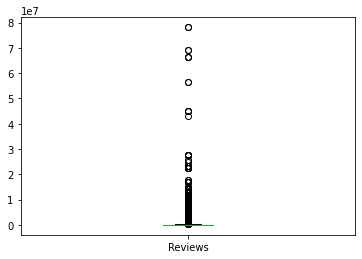

In [105]:
data.Reviews.plot(kind = 'box'); # box plot.

In [106]:
# transfomation
data['Reviews'] = data['Reviews'].apply(lambda x  : np.log(x + 1 ) ) # apply log transformation.

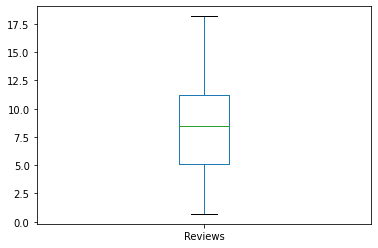

In [107]:
data.Reviews.plot(kind = 'box');

In [108]:
data.Size

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 8886, dtype: object

In [109]:
data.isnull().sum()

App                0
Category           0
Rating             0
Reviews            0
Size               0
                  ..
Type               0
Price              0
Content Rating     0
Last Updated       0
Rating_category    0
Length: 11, dtype: int64

In [110]:
data.Size.value_counts()

Varies with device    1468
14M                    153
13M                    152
12M                    151
11M                    149
                      ... 
552k                     1
496k                     1
292k                     1
203k                     1
713k                     1
Name: Size, Length: 413, dtype: int64

In [111]:
def value_to_float(x):
    
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        else:
            return 1000.0
    
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        else:
            return 1000000.0
    else:
        return -1 
        
data['Size'] = data['Size'].apply(value_to_float)

In [112]:
data.Size.isnull().sum()

0

In [113]:
data.Size = data.Size.apply( lambda x :  x if x != -1 else np.median( data.Size ) )

In [114]:
data.Size.value_counts()

9400000.0     1743
14000000.0     153
13000000.0     152
12000000.0     151
15000000.0     149
              ... 
84000000.0       9
65000000.0       9
86000000.0       7
90000000.0       5
1000000.0        4
Name: Size, Length: 181, dtype: int64

In [115]:
data.size

97746

In [116]:
data['Size'].sample(10)

7383      6600000.0
2328     10000000.0
3740     12000000.0
6712     72000000.0
1712      9400000.0
10194    47000000.0
4253      2600000.0
8866     24000000.0
303      11000000.0
7646     30000000.0
Name: Size, dtype: float64

In [117]:
data.Installs.sample(1)

153    5,000,000+
Name: Installs, dtype: object

In [118]:
data['Installs'] = data['Installs'].str.replace(r'\D', '')

<ipython-input-118-56838ad1109f>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Installs'] = data['Installs'].str.replace(r'\D', '')


In [119]:
data.Installs = data.Installs.astype(float) 

In [120]:
#######3. Data Preparation 

In [121]:
data = data.drop(columns=(['Rating'] ) )

In [122]:
def replace_rating(Rating_category):
    if Rating_category == "High":
        return 1
    else:
        return 0
    
data['Rating_category'] = data['Rating_category'].apply(replace_rating)

In [123]:
data['Rating_category'].value_counts()

1    8164
0     722
Name: Rating_category, dtype: int64

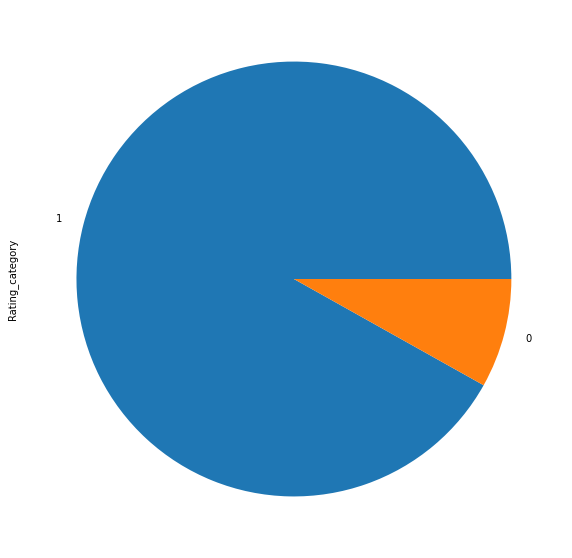

In [126]:
data.Rating_category.value_counts().plot(kind = 'pie' , figsize = (10,10)); # distribution of labels.

In [51]:
data['App'] = data['App'].str.replace('+','').replace(':','').replace('-','').str.replace('[','').str.replace(']','')

<ipython-input-51-0d5a9ac94bd1>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['App'] = data['App'].str.replace('+','').replace(':','').replace('-','').str.replace('[','').str.replace(']','')


In [52]:
data['App'] = data['App'].str.replace('?','').str.replace('¿','')

<ipython-input-52-65dcbf76dc0b>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['App'] = data['App'].str.replace('?','').str.replace('¿','')


In [53]:
data['App'] = data['App'].str.replace(' Â ¿','')

In [54]:
data.columns

Index(['App', 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Last Updated', 'Rating_category'],
      dtype='object')

In [55]:
X = data.drop(columns = 'Rating_category') 
Y = data.Rating_category 

In [56]:
X = X.drop(columns = ['Last Updated' , 'Type' , 'Content Rating' ])

In [57]:
X = pd.get_dummies( X )


In [58]:
X.sample( 5 )

,Reviews,Size,Installs,Price,App_#NAME,App_.R,App_/u/app,App_058.ba,App_1. FC Köln App,App_10 Best Foods for You,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
1897,15.505547,96000000.0,100000000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7315,5.755742,7700000.0,10000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5540,14.019687,99000000.0,10000000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6612,3.555348,3200000.0,1000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1821,9.852036,81000000.0,1000000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
X.Reviews = X.Reviews.apply(lambda  x : ( x- np.mean(X.Reviews)) / np.std(X.Reviews))
X.Size = X.Size.apply(lambda  x : ( x- np.mean(X.Size)) / np.std(X.Size))
X.Installs = X.Installs.apply(lambda  x : ( x- np.mean(X.Installs)) / np.std(X.Installs))
X.Price = X.Price.apply(lambda  x : ( x- np.mean(X.Price)) / np.std(X.Price))

In [60]:
X.sample( 5 )

,Reviews,Size,Installs,Price,App_#NAME,App_.R,App_/u/app,App_058.ba,App_1. FC Köln App,App_10 Best Foods for You,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
10570,-1.080696,0.146270,-0.190969,0.063387,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5624,0.589335,0.054508,-0.179407,-0.059499,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4862,0.751529,-0.496067,-0.075239,-0.059499,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9420,-1.579093,-0.886058,-0.190980,-0.059499,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6298,0.625668,-0.523596,-0.133110,-0.059499,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
#Model training, and testing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

/home/ahmed/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [62]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test  = train_test_split(X, Y ,test_size = 0.2  , stratify   =  Y)

In [63]:
print(f"shape of x_tain {x_train.shape}")
print(f"shape of y_train {y_train.shape}")
print(f"shape of x_test {x_test.shape}")
print(f"shape of y_test {y_test.shape}")

shape of x_tain (7108, 8221)
shape of y_train (7108,)
shape of x_test (1778, 8221)
shape of y_test (1778,)


In [64]:
model = LogisticRegression()

In [65]:
model.fit( x_train , y_train )

LogisticRegression()

In [66]:
print( model.score(x_train , y_train))
print( model.score(x_test ,  y_test ))

0.919527293190771
0.9190101237345332


In [67]:
# select some features.

Index(['Reviews', 'Size', 'Installs', 'Price', 'App_#NAME', 'App_.R',
       'App_/u/app', 'App_058.ba', 'App_1. FC Köln App',
       'App_10 Best Foods for You',
       ...
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_WEATHER'],
      dtype='object', length=8221)

In [69]:
from sklearn import tree

In [73]:
#DecisionTreeClassifier
clf = tree.DecisionTreeClassifier(max_depth = 50 )
clf.fit(x_train , y_train )
print(f"accuracy on train {clf.score(x_train , y_train )}")
print(f"accuracy on test {clf.score(x_test , y_test )}")

accuracy on train 0.9746764209341587
accuracy on test 0.9105736782902137
